In [ ]:
from __future__ import absolute_import, division, print_function

In [ ]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Class names
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

In [ ]:
# Check data shapes
print("Training images shape:", train_images.shape)
print("Number of training labels:", len(train_labels))
print("Testing images shape:", test_images.shape)
print("Number of testing labels:", len(test_labels))

Training images shape: (60000, 28, 28)
Number of training labels: 60000
Testing images shape: (10000, 28, 28)
Number of testing labels: 10000


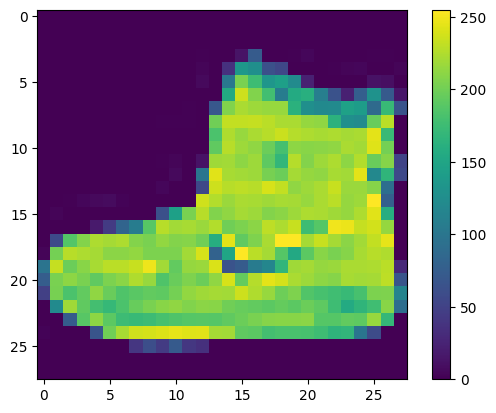

In [ ]:
# Display one image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

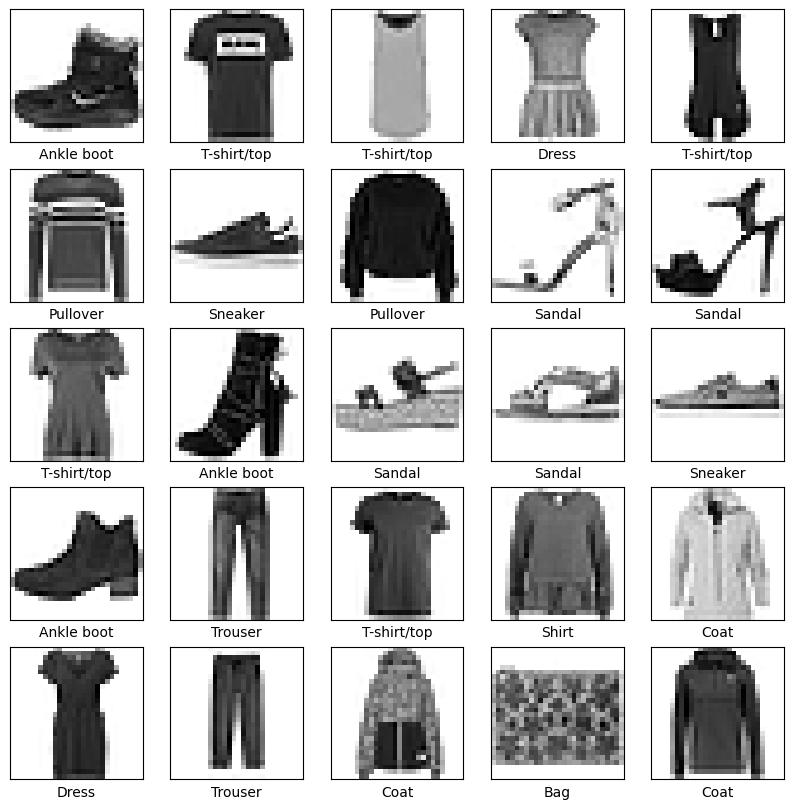

In [ ]:
# Display first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([]); plt.yticks([]); plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7840 - loss: 0.6276
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8642 - loss: 0.3835
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8757 - loss: 0.3399
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8851 - loss: 0.3153
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8903 - loss: 0.2969


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8775 - loss: 0.3494
Test accuracy: 0.8748999834060669


In [ ]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Show first prediction and actual label
print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", test_labels[0])

Predicted label: 9
Actual label: 9


In [ ]:
# Plot function for image with prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
# In the cell starting with 'predicted_label = np.argmax(predictions_array)'
# Replace the undefined 'predictions_array' with the 'predictions' variable from previous cell.
predicted_label = np.argmax(predictions[0]) # Using predictions[0] to get the prediction for the first image, similar to how true_label and img are accessed in plot_image
# Assuming true_label and img will be taken from the first element of their respective arrays, for consistency
true_label = test_labels[0]
img = test_images[0]
color = 'blue' if predicted_label == true_label else 'red'

Text(0.5, 0, 'Ankle boot 82% (Ankle boot)')

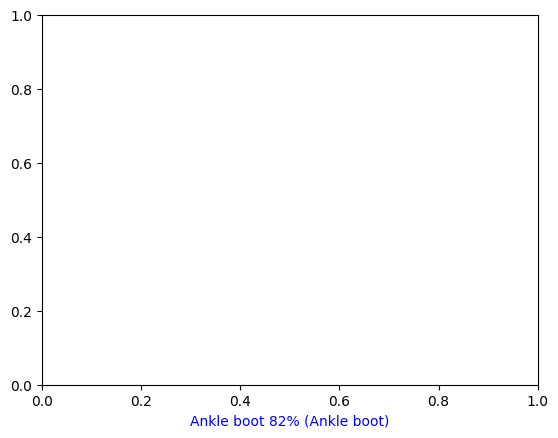

In [ ]:
plt.xlabel("{} {:2.0f}% ({})".format(
    class_names[predicted_label],
    100*np.max(predictions[0]), # Use predictions[0] here instead of predictions_array
    class_names[true_label]
), color=color)

In [ ]:
# Plot function for prediction probabilities
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

In [ ]:
# Plot function for prediction probabilities
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    bars = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array) # This line and the following two should be indented
    bars[predicted_label].set_color('red')        # to be inside the function definition
    bars[true_label].set_color('blue')

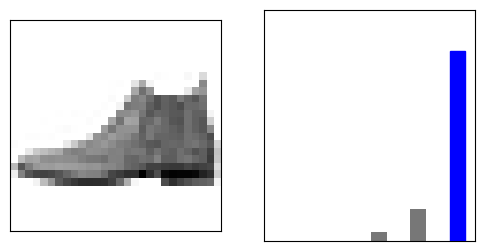

In [ ]:
# Show one prediction with graph
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Show multiple predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

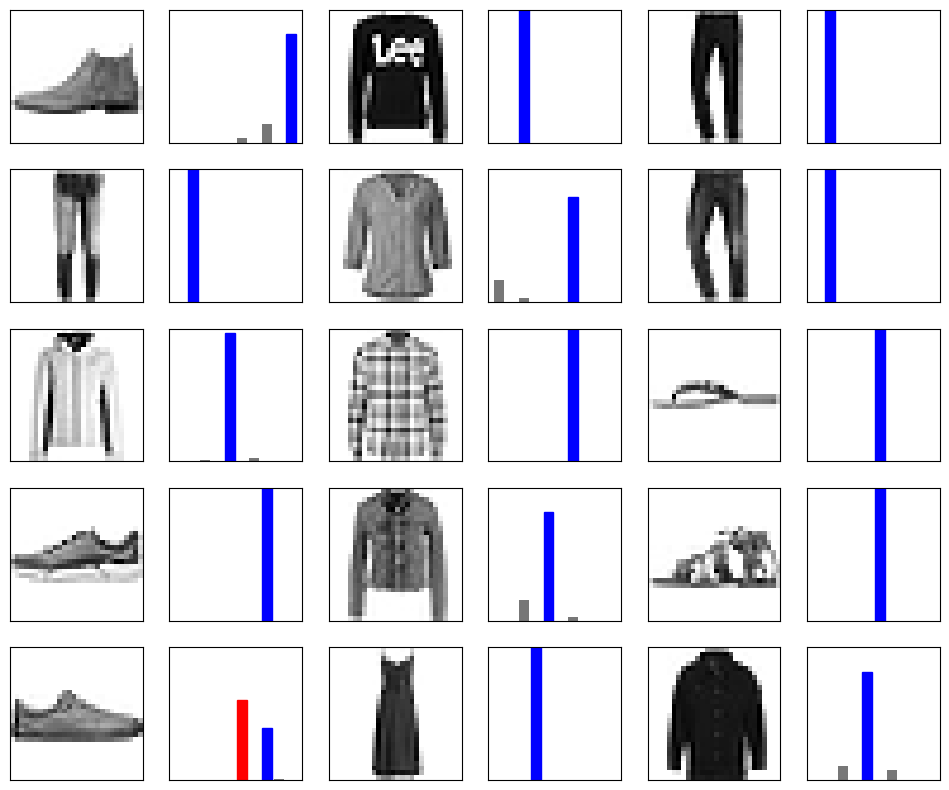

In [ ]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Predict a single image
img = test_images[0]
print("Image shape before expansion:", img.shape)

Image shape before expansion: (28, 28)


In [ ]:
img = np.expand_dims(img, 0)
print("Image shape after expansion:", img.shape)

Image shape after expansion: (1, 28, 28)


In [ ]:
predictions_single = model.predict(img)
print("Predicted probabilities:", predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted probabilities: [[1.8328654e-04 2.7814551e-07 4.5968281e-06 1.5559434e-06 9.8022747e-06
  3.7233725e-02 1.4100173e-04 1.4061587e-01 1.7487322e-04 8.2163507e-01]]


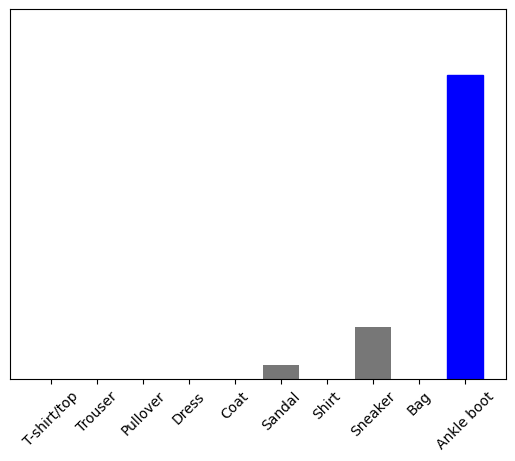

In [ ]:
# Plot the prediction probabilities
plot_value_array(0, predictions_single, [test_labels[0]])
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
# Show predicted class
print("Predicted label:", np.argmax(predictions_single[0]))

Predicted label: 9
